Found 69 images belonging to 8 classes.
Found 26 images belonging to 8 classes.
Found 20 images belonging to 8 classes.
Epoch 1/10
3/3 [==============================] - 27s 1s/step - loss: 2.1437 - accuracy: 0.0870 - val_loss: 2.1483 - val_accuracy: 0.2000
Epoch 2/10
3/3 [==============================] - 5s 1s/step - loss: 2.0599 - accuracy: 0.1739 - val_loss: 2.2248 - val_accuracy: 0.1500
Epoch 3/10
3/3 [==============================] - 3s 2s/step - loss: 2.0498 - accuracy: 0.2174 - val_loss: 2.4820 - val_accuracy: 0.1500
Epoch 4/10
3/3 [==============================] - 3s 2s/step - loss: 2.0595 - accuracy: 0.2174 - val_loss: 2.5354 - val_accuracy: 0.2000
Epoch 5/10
3/3 [==============================] - 5s 2s/step - loss: 2.0074 - accuracy: 0.2029 - val_loss: 2.6789 - val_accuracy: 0.2000
Epoch 6/10
3/3 [==============================] - 4s 1s/step - loss: 1.9391 - accuracy: 0.2319 - val_loss: 2.5226 - val_accuracy: 0.2000
Epoch 7/10
3/3 [==============================] - 3s 2s/s

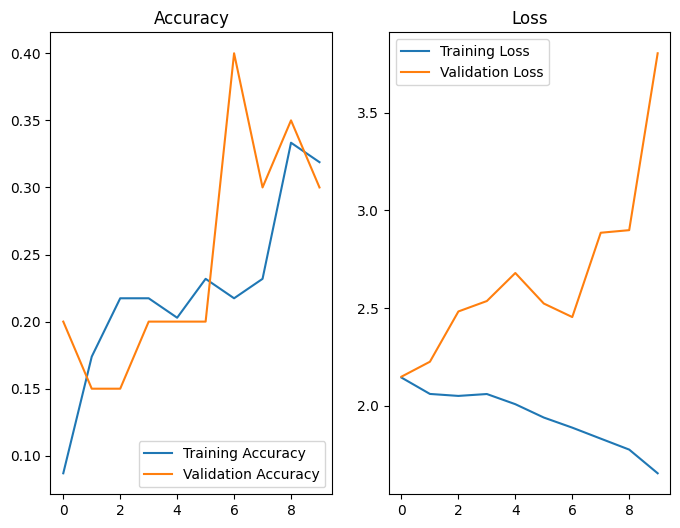

1/1 [==============================] - 1s 794ms/step - loss: 4.2468 - accuracy: 0.2308
Test accuracy: 23.08%
1/1 [==============================] - 2s 2s/step


ValueError: ignored

In [22]:
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the dataset
train_dir = "/content/drive/MyDrive/Colab Notebooks/spine_x_ray_2/train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/spine_x_ray_2/test"
val_dir = "/content/drive/MyDrive/Colab Notebooks/spine_x_ray_2/val"

# Define the number of classes
num_classes = 8

# Create the data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.15, zoom_range=0.15, horizontal_flip=True, vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Generate the training data
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), color_mode="rgb", batch_size=32, class_mode="categorical")

# Generate the test data
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), color_mode="rgb", batch_size=32, class_mode="categorical")

# Generate the validation data
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(256, 256), color_mode="rgb", batch_size=16, class_mode="categorical")

# Build the Xception model
base_model = Xception(include_top=False, input_shape=(256, 256, 3), pooling="avg")
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Plot the training and validation accuracy and loss
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy: {:.2%}".format(test_acc))

# Make predictions on the test set
test_preds = model.predict(test_generator)

# Convert the predicted probabilities to class labels
test_labels = np.argmax(test_preds, axis=1)

# Print the confusion matrix
conf_mat = confusion_matrix(test_labels, test_generator.class_indices)
print(conf_mat)

# Save the trained model
model.save("/content/drive/MyDrive/trained_model.hdf5")

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
!pip install os

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [ ]:
!pip install numpy

In [ ]:
!pip install pandas